In [1]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml("MNIST_784")

In [4]:
X, y = mnist['data'], mnist['target']

In [5]:
X.shape, y.shape

((70000, 784), (70000,))

In [6]:
import matplotlib

In [7]:
import matplotlib.pyplot as plt

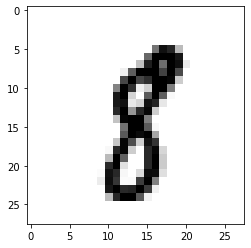

In [8]:
plt.imshow(X[300].reshape(28,28), cmap = matplotlib.cm.binary)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [10]:
neighbors = KNeighborsClassifier()

In [57]:
neighbors.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [58]:
neighbors.predict([X[300]])

array(['8'], dtype=object)

In [59]:
cross_val_score(neighbors, X_train, y_train, cv = 3, scoring = "accuracy")
# Three numbers means score for 3 different folds

array([0.96620246, 0.96721663, 0.96511628])

In [60]:
neighbors.score(X_train, y_train)

0.9809821428571428

In [11]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_neighbors': [3,5,7,11], 'weights': ['uniform', 'distance']}]
knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, verbose = 3, cv = 3, n_jobs = -1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  24 | elapsed: 60.8min remaining: 85.1min
[Parallel(n_jobs=-1)]: Done  19 out of  24 | elapsed: 79.0min remaining: 20.8min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 86.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid=[{'n_neighbors': [3, 5, 7, 11],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [12]:
grid_search.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [15]:
grid_search.best_score_

0.9685892857142857

In [ ]:
grid_search.fit(X_train, y_train)

In [35]:
from sklearn.metrics import accuracy_score
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9737142857142858

In [ ]:
# Data Augmentation

In [16]:
from scipy.ndimage.interpolation import shift


In [17]:
def shift_image(image, dx, dy):
    image = image.reshape(28, 28)
    shifted_image = shift(image, shift = [dy, dx], cval = 0, mode = 'constant')
    return shifted_image.reshape([-1])

In [18]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

In [19]:
for dy, dx in ((1,0), (0,1), (-1,0), (0,-1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dy, dx))
        y_train_augmented.append(label)

In [21]:
import numpy as np

In [22]:
X_train_more = np.array(X_train_augmented)
y_train_more = np.array(y_train_augmented)

In [27]:
# shuffle index
shuffle_idx = np.random.permutation(len(X_train_more))
X_train_new = X_train_more[shuffle_idx]
y_train_new = y_train_more[shuffle_idx]

In [28]:
y_train_new

array(['2', '8', '2', ..., '4', '1', '4'], dtype='<U1')

In [29]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [30]:
knn_clf.fit(X_train_new, y_train_new)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [33]:
from sklearn.metrics import accuracy_score

In [31]:
y_pred = knn_clf.predict(X_test)

NameError: name 'accuracy_score' is not defined

In [34]:
accuracy_score(y_test, y_pred)

0.9798571428571429

In [ ]:
# Tatanic Dataset

In [39]:
# import requests, os

In [40]:
# url_train = 'https://www.kaggle.com/c/titanic/data?select=train.csv'
# url_test = 'https://www.kaggle.com/c/titanic/data?select=test.csv'
# titanic_path = 'C:/Users/yzho0040/Python_Basic/Hands on ML/datasets/Titanic'

In [41]:
# def fetch_titanic_data(url, path, name):
#     if not os.path.isdir(path):
#         os.makedirs(path)
#     save_path = os.path.join(path, name)
#     file = requests.get(url)
#     with open(save_path, 'wb') as output:
#         output.write(file.content)
#     print("Done!")

In [ ]:
# fetch_titanic_data(url_train, path = titanic_path, name = 'train.csv')
# fetch_titanic_data(url_test, path = titanic_path, name = 'test.csv')

In [43]:
import pandas as pd
import numpy as np

In [78]:
def load_data(filename):
    path = os.path.join('datasets', 'titanic')
    csv_path = os.path.join(path, filename)
    return pd.read_csv(csv_path)

In [80]:
train = load_data('train.csv')

In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [82]:
train.describe()
# We can see the surviving rate is less than 39%
# Also we can see mean age and mean fare

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [83]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
# use value_counts() to see values in different categories
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [86]:
# Plots 

In [87]:
# Build pipelines

In [107]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

In [108]:
class DF_Selector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [109]:
from sklearn.pipeline import Pipeline

In [110]:
num_pipeline= Pipeline([
    ("select_numeric", DF_Selector(['Age', 'SibSp', 'Parch', 'Fare'])),
    ("imputer", SimpleImputer(strategy = 'median')),
])

In [112]:
train_transformed = num_pipeline.fit_transform(train)

In [113]:
train_transformed.shape

(891, 4)

In [125]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y = None):
        self.most_frequent_ = pd.Series([X[c].value_counts() .index[0] for c in X], index = X.columns)
        return self
    def transform(self, X, y = None):
        return (X.fillna(self.most_frequent_))

In [126]:
from sklearn.preprocessing import OneHotEncoder

In [127]:
cat_pipeline = Pipeline([
    ("select_cat", DF_Selector(['Pclass', 'Sex', 'Embarked'])),
    ("imputer", MostFrequentImputer()),
    ("cat_encoder", OneHotEncoder(sparse = False))
])

In [128]:
cat_pipeline.fit_transform(train)

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [129]:
from sklearn.pipeline import FeatureUnion

In [130]:
preprocess_pipeline = FeatureUnion(transformer_list = [
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

In [131]:
X_train = preprocess_pipeline.fit_transform(train)

In [132]:
y_train = train['Survived']

In [133]:
from sklearn.svm import SVC

In [134]:
svm_clf = SVC(gamma = 'auto')
svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [135]:
test = load_data('test.csv')

In [137]:
X_test = preprocess_pipeline.transform(test)

In [140]:
y_pred = svm_clf.predict(X_test)

In [141]:
from sklearn.model_selection import cross_val_score

In [142]:
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv = 10)

In [145]:
svm_scores.mean()

0.7365250822835092

In [146]:
# Another model

In [147]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=20)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8059760526614459

Text(0, 0.5, 'Accuracy')

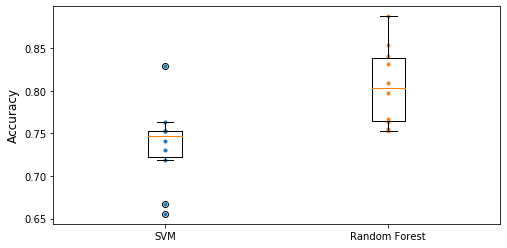

In [156]:
# Visualization
plt.figure(figsize = (8,4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels = ("SVM", "Random Forest"))
plt.ylabel("Accuracy", fontsize = 12)

In [162]:
train['Age Bucket'] = train['Age'] // 15 *15

In [165]:
train[['Age Bucket', 'Survived']].groupby(['Age Bucket']).mean()

,Survived
Age Bucket,
0.0,0.576923
15.0,0.362745
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


In [166]:
train['Relative'] = train['SibSp'] + train['Parch']

In [168]:
train[['Relative', 'Survived']].groupby(['Relative']).mean()

,Survived
Relative,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [169]:
# Spam Classifier

In [170]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "http://spamassassin.apache.org/old/publiccorpus/"
HAM_URL = DOWNLOAD_ROOT + "20030228_easy_ham.tar.bz2"
SPAM_URL = DOWNLOAD_ROOT + "20030228_spam.tar.bz2"
SPAM_PATH = os.path.join("datasets", "spam")

def fetch_spam_data(spam_url=SPAM_URL, spam_path=SPAM_PATH):
    if not os.path.isdir(spam_path):
        os.makedirs(spam_path)
    for filename, url in (("ham.tar.bz2", HAM_URL), ("spam.tar.bz2", SPAM_URL)):
        path = os.path.join(spam_path, filename)
        if not os.path.isfile(path):
            urllib.request.urlretrieve(url, path)
        tar_bz2_file = tarfile.open(path)
        tar_bz2_file.extractall(path=SPAM_PATH)
        tar_bz2_file.close()

In [171]:
fetch_spam_data()

In [175]:
os.path.isfile(os.path.join(SPAM_PATH, "tt.tar.bz2"))

False

In [176]:
os.path.join(SPAM_PATH, "easy_ham")

'datasets\\spam\\easy_ham'

In [177]:
sorted(os.path.join(SPAM_PATH, "easy_ham"))

['\\',
 '\\',
 '_',
 'a',
 'a',
 'a',
 'a',
 'a',
 'd',
 'e',
 'e',
 'h',
 'm',
 'm',
 'p',
 's',
 's',
 's',
 's',
 't',
 't',
 'y']